# Star Wars survey analysis

The goal of this project is to analyse a survey that was done on star wars movies. We want to see for example which movies have the best rankings and the differences by gender.

#### Preparing the data

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
print(star_wars.shape)
print(star_wars.columns)

(1187, 38)
Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar wit

In [4]:
#we use star_wars_2 just to check before overwriting
star_wars_2 = star_wars[star_wars['RespondentID'].notnull()]
print(star_wars_2.shape)
print(star_wars['RespondentID'].isnull().sum())

star_wars = star_wars_2

(1186, 38)
1


#### Below we convert Yes and No to True and False

In [5]:
col2 = 'Have you seen any of the 6 films in the Star Wars franchise?'
col3 = 'Do you consider yourself to be a fan of the Star Wars film franchise?'
print(star_wars[col2].value_counts())
print(star_wars[col3].value_counts())

yes_no = {'Yes' : True, 'No' : False}
star_wars[col2] = star_wars[col2].map(yes_no)
star_wars[col3] = star_wars[col3].map(yes_no)
print(star_wars[col2].value_counts())
print(star_wars[col3].value_counts())

        

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [6]:
#We print to make sure we copy the right values (spaces inconsistent)
print(star_wars.head(3))

   RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              
3  3.292765e+09                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
1           Star Wars: Episode I  The Phantom Menace                                    
2                                                NaN                                    
3           Star Wars: Episode I  The Phantom Menace                                    

                 

#### Below we change column names for movies seen, and replace values to True or False

In [7]:
star_wars_2 = star_wars

cols = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
        'Unnamed: 4' : 'seen_2', 
        'Unnamed: 5' : 'seen_3', 
        'Unnamed: 6' : 'seen_4', 
        'Unnamed: 7' : 'seen_5', 
        'Unnamed: 8' : 'seen_6'
       }

star_wars_2 = star_wars_2.rename(columns = cols)
print(star_wars_2.columns[0:10])

import numpy as np
val_map = {'Star Wars: Episode I  The Phantom Menace' : True, 
           'Star Wars: Episode II  Attack of the Clones' : True, 
           'Star Wars: Episode III  Revenge of the Sith' : True, 
           'Star Wars: Episode IV  A New Hope' : True, 
           'Star Wars: Episode V The Empire Strikes Back' : True, 
           'Star Wars: Episode VI Return of the Jedi' : True,
           'np.NaN' : False
          }

seens = star_wars_2.columns[3:9]

for i in seens :
    star_wars_2[i] = star_wars_2[i].map(val_map)

star_wars_2.head()

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.'],
      dtype='object')


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [8]:
star_wars = star_wars_2

#### We rename the columns for rankings, and change type to float

In [9]:
star_wars_2 = star_wars

rank_cols = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
        'Unnamed: 10' : 'ranking_2', 
        'Unnamed: 11' : 'ranking_3', 
        'Unnamed: 12' : 'ranking_4', 
        'Unnamed: 13' : 'ranking_5', 
        'Unnamed: 14' : 'ranking_6'
       }

star_wars_2 = star_wars_2.rename(columns = rank_cols)
print(star_wars_2.columns[0:17])
print()

rank_cols_vals = star_wars_2.columns[9:15]

print(rank_cols_vals)
print()

print(star_wars_2.iloc[:,9:15].head())
print()

for x in rank_cols_vals :
    star_wars_2[x] = star_wars_2[x].astype(float)
print(star_wars_2.iloc[:,9:15].head())


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16'],
      dtype='object')

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

  ranking_1 ranking_2 ranking_3 ranking_4 ranking_5 ranking_6
1         3         2         1         4         5         6
2       NaN       NaN       NaN       NaN       NaN       NaN
3         1         2         3         4         5         6
4         5         6         1         2         4         3
5         5         4         6         2         1         3

   ranking_1  rank

In [10]:
star_wars = star_wars_2

#### Let's now look at the means of the rankings in a bar chart.

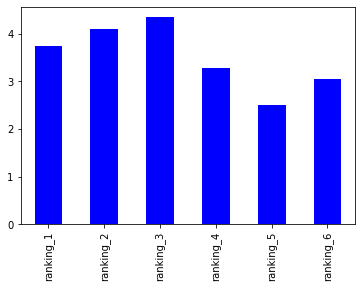

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

rank_means = star_wars.iloc[:,9:15].mean()
rank_means.plot(kind = 'bar', color = 'blue')

The 5th movie seems to have lowest ( best ) ranking.

#### Let's now look at how many people watched the movies.

(1186, 38)
seen_1    673.0
seen_2    571.0
seen_3    550.0
seen_4    607.0
seen_5    758.0
seen_6    738.0
dtype: float64


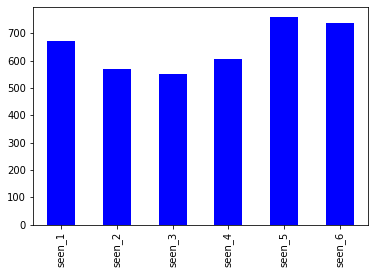

In [12]:
print(star_wars.shape)
movies_seen = star_wars[star_wars.columns[3:9]].sum()
print(movies_seen)

movies_seen.plot(kind = 'bar',color = 'blue')

More people saw the original movies.

#### Let's now split by gender.

In [13]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

###### Rankings by gender

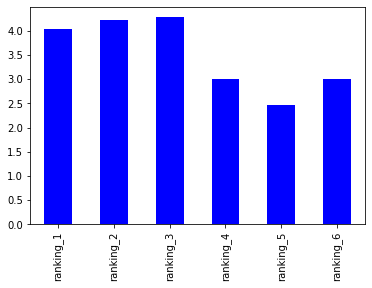

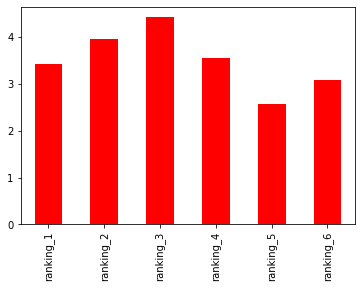

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

#I initially wrote this code for subplots, but then simplified with 2 plt.show()
#fig = plt.figure()
#fig, ax = plt.subplots()
#ax1 = fig.add_subplot(1,1,1)
#ax2 = fig.add_subplot(1,2,2)

males[males.columns[9:15]].mean().plot(kind = 'bar', color = 'blue')
plt.show()
females[females.columns[9:15]].mean().plot(kind = 'bar', color = 'red')
plt.show()

###### Times seen by gender

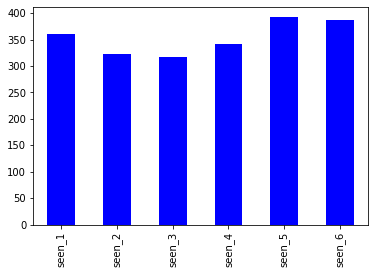

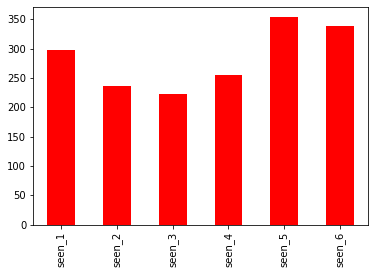

In [15]:
males[males.columns[3:9]].sum().plot(kind = 'bar', color = 'blue')
plt.show()
females[females.columns[3:9]].sum().plot(kind = 'bar', color = 'red')
plt.show()